# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
import math
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

Text(0, 0.5, 'Ratio')

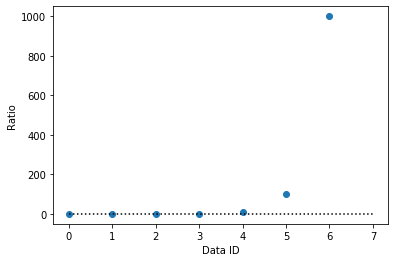

In [3]:
rang_len = range(len(ratio))
plt.scatter(rang_len,ratio)
plt.plot(range(8), [0,0,0,0,0,0,0,0], ls=':', color='black')
plt.xlabel('Data ID')
plt.ylabel('Ratio')

**Q: Explain what's bad about this plot.**

In [4]:
'''for Ratio axis, if x<y, it plots only using Ratio<1, otherwise Ratio>1, thus it is unfair for x<y and y>x situation.'''

'for Ratio axis, if x<y, it plots only using Ratio<1, otherwise Ratio>1, thus it is unfair for x<y and y>x situation.'

**Q: Can you fix it? **

In [5]:
# Implement

x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y.tolist()

print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


[-6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137]


Text(0, 0.5, 'Log Ratio')

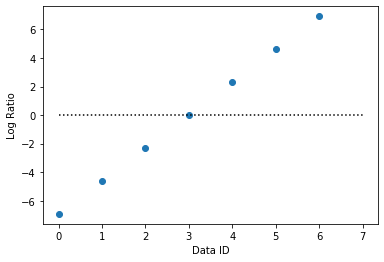

In [6]:
log_ratio = [math.log(a) for a in ratio]
print(log_ratio)

rang_len = range(len(log_ratio))
plt.scatter(rang_len, log_ratio)
plt.plot(range(8), [0,0,0,0,0,0,0,0], ls=':', color='black')
plt.xlabel('Data ID')
plt.ylabel('Log Ratio')

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [7]:
# TODO
movies = vega_datasets.data.movies()
movies = movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes', 'Rotten_Tomatoes_Rating'])
len(movies)

2260

In [8]:
type(movies)

pandas.core.frame.DataFrame

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

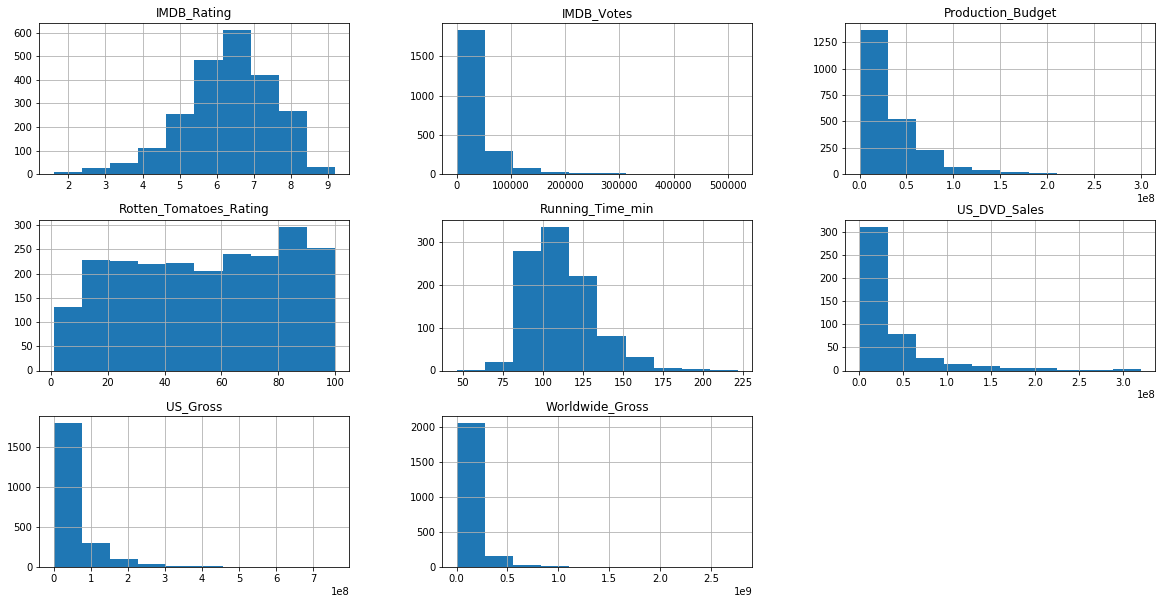

In [9]:
ax = movies.hist(figsize=(20, 10))

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

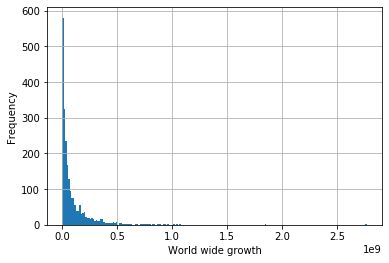

In [10]:
ax = movies.Worldwide_Gross.hist(bins=200)
ax.set_xlabel("World wide growth")
ax.set_ylabel("Frequency")
plt.show()

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

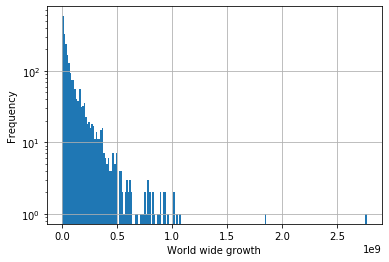

In [11]:
# Implement
ax = movies.Worldwide_Gross.hist(log=True, bins=200)
ax.set_xlabel("World wide growth")
ax.set_ylabel("Frequency")
plt.show()

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


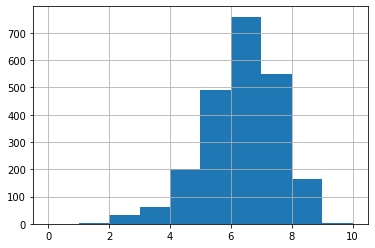

In [12]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [13]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [14]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

In [15]:
movies.Worldwide_Gross

4         1087522.0
8         6341826.0
9        20400001.0
10       37600001.0
11       37402878.0
           ...     
3195     98690287.0
3196     36851126.0
3198     12506189.0
3199    141475337.0
3200    233700001.0
Name: Worldwide_Gross, Length: 2260, dtype: float64

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [16]:
start = min(movies.Worldwide_Gross)
end = max(movies.Worldwide_Gross)
print(start, end)
bins = np.logspace(np.log10(start), np.log10(end), 20)
print(bins)

1.0 2767891500.0
[1.00000000e+00 3.14018485e+00 9.86076088e+00 3.09646119e+01
 9.72346052e+01 3.05334634e+02 9.58807191e+02 3.01083182e+03
 9.45456845e+03 2.96890926e+04 9.32292387e+04 2.92757043e+05
 9.19311230e+05 2.88680720e+06 9.06510822e+06 2.84661155e+07
 8.93888645e+07 2.80697558e+08 8.81442219e+08 2.76789150e+09]


Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

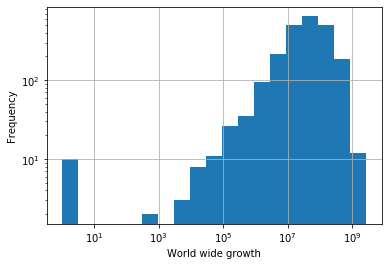

In [17]:
ax = movies.Worldwide_Gross.hist(log=True, bins=bins)
plt.gca().set_xscale("log")
ax.set_xlabel("World wide growth")
ax.set_ylabel("Frequency")
plt.show()

What is going on? Is this the right plot?

**Q: explain and fix**

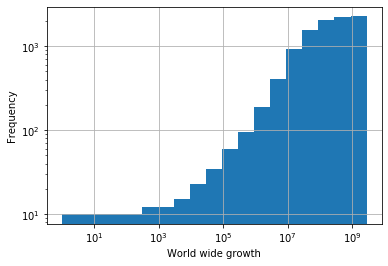

In [18]:
ax = movies.Worldwide_Gross.hist(log=True, bins=bins, cumulative=True)
plt.gca().set_xscale("log")
ax.set_xlabel("World wide growth")
ax.set_ylabel("Frequency")
plt.show()

**Q: Can you explain the plot? Why are there gaps?**

In [19]:
'''It was not cumulative, now there are no gap.'''

'It was not cumulative, now there are no gap.'

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

In [20]:
bins = np.logspace(np.log10(start), np.log10(end), 1000)

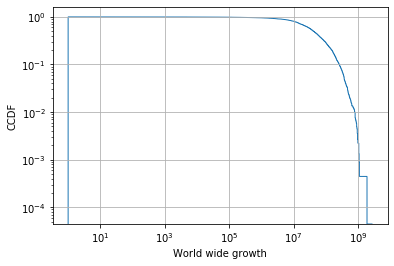

In [21]:
ax = movies.Worldwide_Gross.hist(log=True, bins=bins, cumulative=-1, histtype="step", density=True)
plt.gca().set_xscale("log")
ax.set_xlabel("World wide growth")
ax.set_ylabel("CCDF")
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

In [105]:
data_r = pd.DataFrame(movies.Worldwide_Gross.tolist()[::-1], index = movies.index, columns = ['Worldwide_Gross'])

In [111]:
y = [20, 250, 100000]

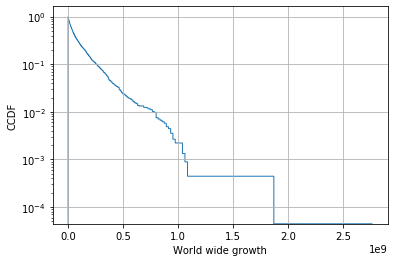

In [115]:
ax = movies.Worldwide_Gross.hist(log=True, bins=bins, cumulative=-1, histtype="step", density=True)
plt.gca().set_yscale("log")
ax.set_xlabel("World wide growth")
ax.set_ylabel("CCDF")
plt.show()

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [127]:
# Implement
movies.loc[movies.Worldwide_Gross.idxmax()]

Title                                  Avatar
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
US_DVD_Sales                      1.46154e+08
Production_Budget                    2.37e+08
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                     83
IMDB_Rating                               8.3
IMDB_Votes                             261439
Name: 1234, dtype: object

In [128]:
# Implement
movies.iloc[movies.Worldwide_Gross.idxmax()]

Title                             Georgia Rule
US_Gross                           1.88829e+07
Worldwide_Gross                    2.08196e+07
US_DVD_Sales                       1.93823e+07
Production_Budget                        2e+07
Release_Date                       May 11 2007
MPAA_Rating                                  R
Running_Time_min                           111
Distributor                          Universal
Source                     Original Screenplay
Major_Genre                              Drama
Creative_Type             Contemporary Fiction
Director                        Garry Marshall
Rotten_Tomatoes_Rating                      17
IMDB_Rating                                5.8
IMDB_Votes                               10902
Name: 1808, dtype: object

In [131]:
'''loc, because idmax returns the actual index(loc) of the maximum value data not its integer position(iloc)'''

'loc, because idmax returns the actual index(loc) of the maximum value data not its integer position(iloc)'